In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline

#adjust visualization rendering
%matplotlib inline

#adjust the configuration of the plots
matplotlib.rcParams['figure.figsize'] = (12,8)

#set max rows on pd df
pd.set_option('display.max_rows', None)

#change matplot graph style
plt.style.use('ggplot')                        


## Import Csv File

In [2]:
# read in the data

df = pd.read_csv(r"C:\Users\Justin Schwerdt\Documents\data-analytics-projects\movie-industry\orig-movie-data.csv")


In [3]:
# inspect original df

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Handling Null Data

In [4]:
# check for null data

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# replacing null values

#remove rows with missing vital data
df = df[df['budget'].notna()] 
df = df[df['gross'].notna()]
df = df[df['released'].notna()] 

#set values of missing values

#set null scores to mean score of dataframe
df['score'] = df['score'].fillna(df['score'].mean())

#set votes and runtime null values to 0
df['votes'], df['runtime'] = df['votes'].fillna(0), df['runtime'].fillna(0)

#set remaining null values to 'NA'
df = df.fillna('NA')


## Adjusting Datatypes

In [6]:
# checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# change data type of columns for better presentation

# change data type of floats to ints
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')



## Unpacking Cluttered Columns

In [8]:
# unpack 'released' column

#split 'released' at '(' and select the first index of 'released' second index used for country
df['release_date'] = df['released'].astype(str).str.split('(').str[0]

#create release year by -indexing 'release date' by 5 to select year and converting to int
df['release_year'] = df['release_date'].str[-5:].astype(int)

#create release country by spliting 'released' at '(' and selecting second index
df['release_country'] = df['released'].astype(str).str.split('(').str[1]
#strip ')' from end of 'released_country'
df['release_country'] = df['release_country'].str[:-1]

## Removing Columns

In [9]:
# drop unpacked columns from cluttered column

#not all years matched release date
df = df.drop(columns='year')

#removing cluttered column, unpacked to 'release_year', 'release_country', and 'release_date'
df = df.drop(columns='released')

## Sorting Data by Gross Sales

In [10]:
# set df to sort by gross sales descending

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

## Drop Duplicate Rows

In [11]:
# drop any duplicates

df = df.drop_duplicates()

#can check for duplicates in specific columns
#df = df.drop_duplicates(df['column_name'])

In [12]:
# check status of df for more needed cleaning

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year,release_country
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",2009,United States
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2797501328,Marvel Studios,181.0,"April 26, 2019",2019,United States
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2069521700,Lucasfilm,138.0,"December 18, 2015",2015,United States
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2048359754,Marvel Studios,149.0,"April 27, 2018",2018,United States


## Save Cleaned Dataset to CSV

In [13]:
# export new cleaned df to a csv

df.to_csv(r"C:\Users\Justin Schwerdt\Documents\data-analytics-projects\movie-industry\cleaned-movie-data.csv", index=False)

## Create Budget vs Gross Scatter Plot With Matplotlib

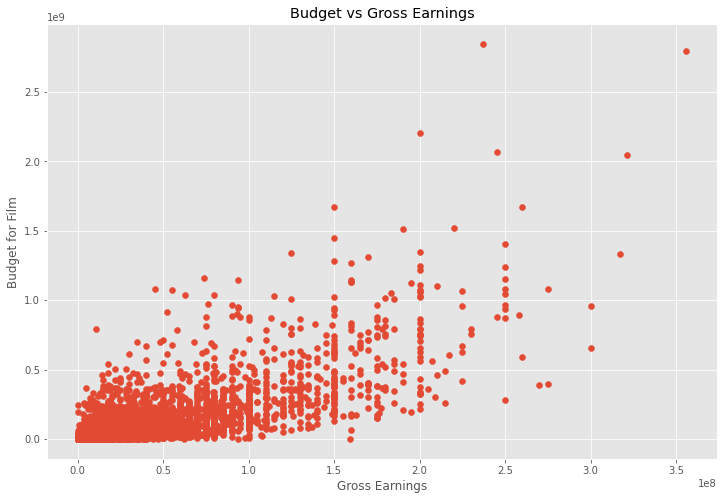

In [14]:
# scatter plot with budget vs gross

#creating the scatter plot
plt.scatter(x=df['budget'], y=df['gross'])

#labeling the scatter plot
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

## Create Budget vs Gross Scatter Plot With Seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

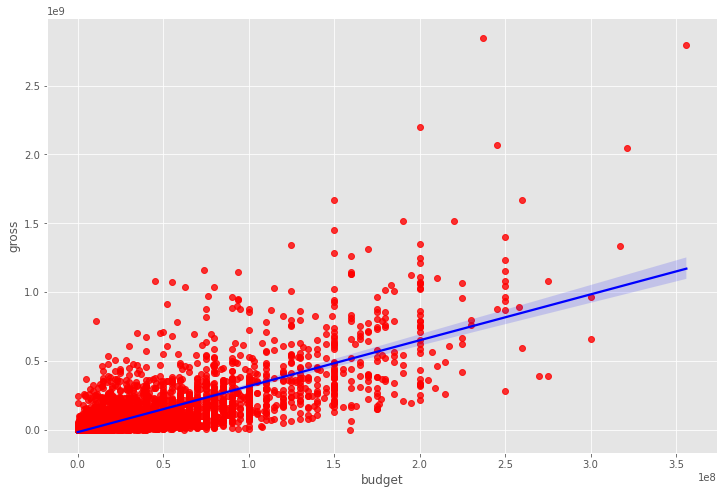

In [15]:
# plot budget vs gross using seaborn with trend line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

## Create Correlation Matrix

In [16]:
# looking at correlation

df.corr()

,score,votes,budget,gross,runtime,release_year
score,1.000000,0.473809,0.071792,0.222143,0.414420,0.061029
votes,0.473809,1.000000,0.440021,0.614904,0.351721,0.202883
budget,0.071792,0.440021,1.000000,0.740395,0.317449,0.320245
gross,0.222143,0.614904,0.740395,1.000000,0.275074,0.268626
runtime,0.414420,0.351721,0.317449,0.275074,1.000000,0.073125
release_year,0.061029,0.202883,0.320245,0.268626,0.073125,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

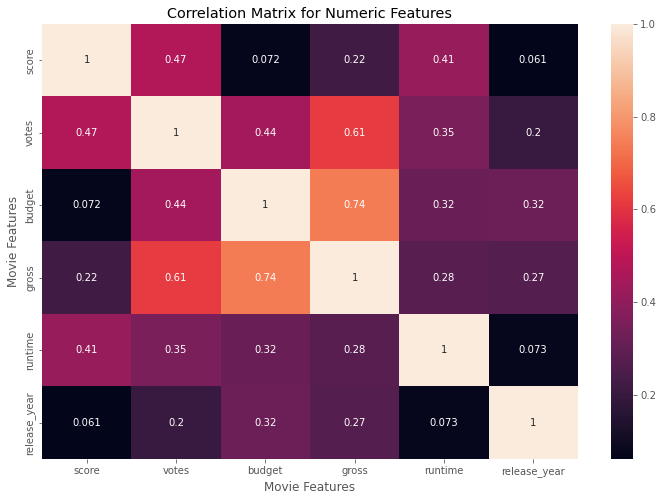

In [17]:
# visualize correlation matrix

#create a matrix
correlation_matrix = df.corr()

#create a correlation heat map
sns.heatmap(correlation_matrix, annot=True)

#labeling correlation heat map
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

## Create Correlation Matrix for All Correlation Combinations

In [18]:
# checking to see if the company has correlation

#creating a copy of the original df so values arent changed
df_numerical = df.copy()

#asigning numerical values to all non-int values
for col_name in df_numerical.columns:
    if df_numerical[col_name].dtype == 'object':
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
        
df_numerical.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year,release_country
5445,387,6,0,7.8,1100000,787,1265,1538,48,237000000.0,2847246203,1389,162.0,497,2009,47
7445,389,6,0,8.4,903000,106,515,1474,48,356000000.0,2797501328,987,181.0,125,2019,47
3045,4923,6,6,7.8,1100000,787,1265,1076,48,200000000.0,2201647264,1389,194.0,503,1997,47
6663,3656,6,0,7.8,876000,770,1810,357,48,245000000.0,2069521700,949,138.0,499,2015,47
7244,390,6,0,8.4,897000,106,515,1474,48,321000000.0,2048359754,987,149.0,133,2018,47


<function matplotlib.pyplot.show(close=None, block=None)>

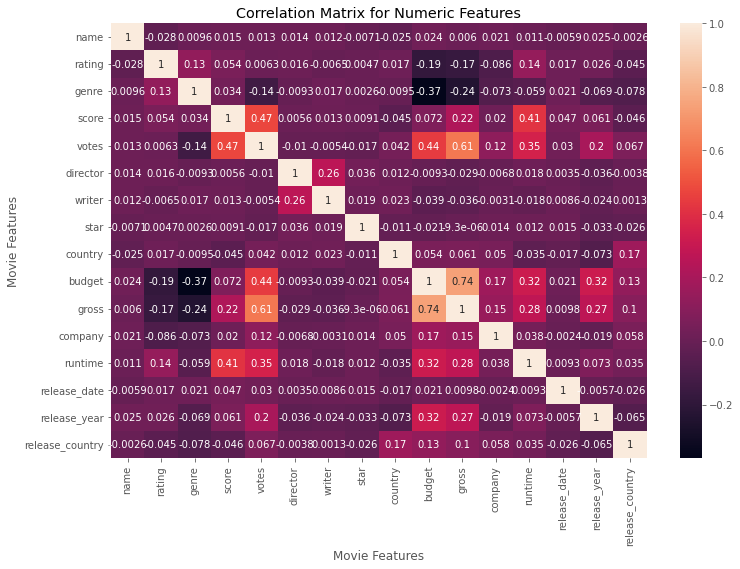

In [19]:
# visualize correlation matrix of all data

#creating a matrix
correlation_matrix = df_numerical.corr(method='pearson')

#create a correlation heat map
sns.heatmap(correlation_matrix, annot=True)

#labeling correlation heat map
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

## Create Correlation Bar Graph

In [20]:
#remove duplicate gross value and sort by decending

#removing the duplicat gross value
bar_graph = correlation_matrix.drop('gross')

#sorting the graph to descending for easier readability
bar_graph_descending = bar_graph.sort_values(by=['gross'], inplace=False, ascending=False)

Text(0, 0.5, 'Gross')

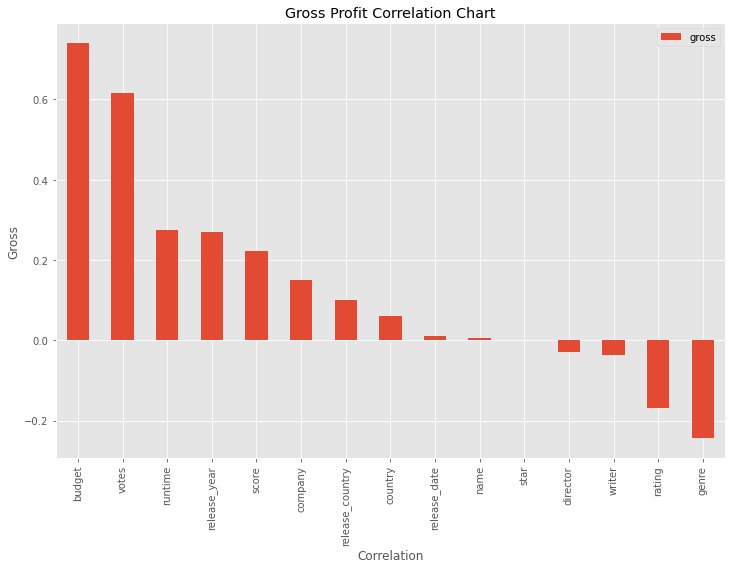

In [21]:
# creating a sorted gross correlation chart

#creating the bar graph
bar_graph_descending[['gross']].plot(kind='bar')

#labeling and customizing Gross Profit Correlation Chart
plt.title('Gross Profit Correlation Chart')
plt.xlabel('Correlation')
plt.ylabel('Gross')

## Create Gross vs Runtime Graph

In [22]:
# create a filter for gross vs runtime graph

#create a df of only runtime and gross
runtime_df = pd.DataFrame(df, columns=['runtime', 'gross'])

#create a df for mean gross per runtime
runtime_df_avg = runtime_df.groupby('runtime').mean().reset_index()

In [23]:
#remove outlier gross data from runtime_df

##create max and min outlier boundarys for runtime_df
max_ = runtime_df['gross'].quantile(0.99)
min_ = runtime_df['gross'].quantile(0.05)

#apply min max outliers boundarys to df
df_clipped = df[df['gross'] > min_]
df_clipped = df[df['gross'] < max_]


#create max and min outlier boundarys for runtime_df_avg
max_avg_runtime = runtime_df_avg['gross'].quantile(0.9)
min_avg_runtime = runtime_df_avg['gross'].quantile(0.05)

#apply min and max outlier boundarys to runtime_df_avg
runtime_clipped = runtime_df_avg[runtime_df_avg['gross'] > min_avg_runtime]
runtime_clipped = runtime_df_avg[runtime_df_avg['gross'] < max_avg_runtime]


<function matplotlib.pyplot.show(close=None, block=None)>

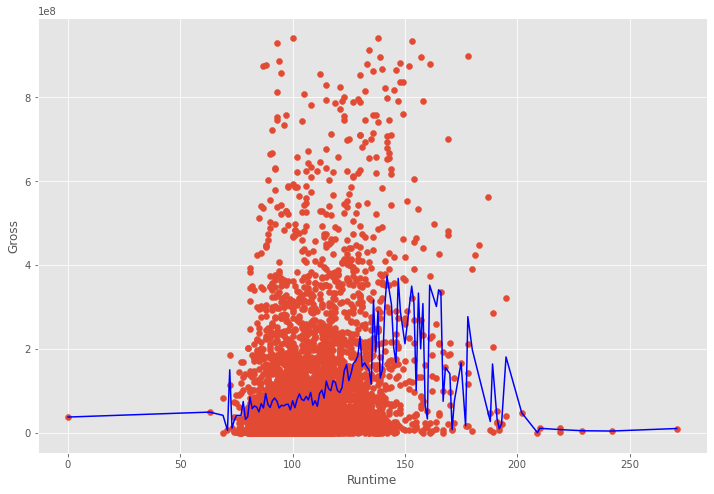

In [24]:
#create a plot for runtime vs gross

#creating the scatterplot
plt.scatter('runtime', 'gross', data=df_clipped)

#adding an average line
plt.plot('runtime', 'gross', data=runtime_clipped, c='b')

#labeling gross vs Runtime
plt.xlabel('Runtime')
plt.ylabel('Gross')

plt.show

## Create Gross vs Budget Graph

In [25]:
# create a filter for gross vs budget graph

#create a df of only budget and gross
budget_df = pd.DataFrame(df, columns=['budget', 'gross'])

#create a df for mean gross per runtime
budget_df_avg = budget_df.groupby('budget').mean().reset_index()

In [26]:
#remove outlier gross data from budget_df

##create max and min outlier boundarys budget_df
max_ = budget_df['gross'].quantile(0.99)
min_ = budget_df['gross'].quantile(.05)

#apply min max outliers boundarys to df
df_clipped = df[df['gross'] > min_]
df_clipped = df[df['gross'] < max_]

#create max and min outlier boundarys for budget_df_avg
max_avg_budget = budget_df_avg['gross'].quantile(q=.95)
min_avg_budget = budget_df_avg['gross'].quantile(q=.1)

#apply min and max outlier boundarys to budget_df_avg
budget_clipped = budget_df_avg.loc[(budget_df_avg['gross']>min_avg_budget) & (budget_df_avg['gross']< max_avg_budget)]

<function matplotlib.pyplot.show(close=None, block=None)>

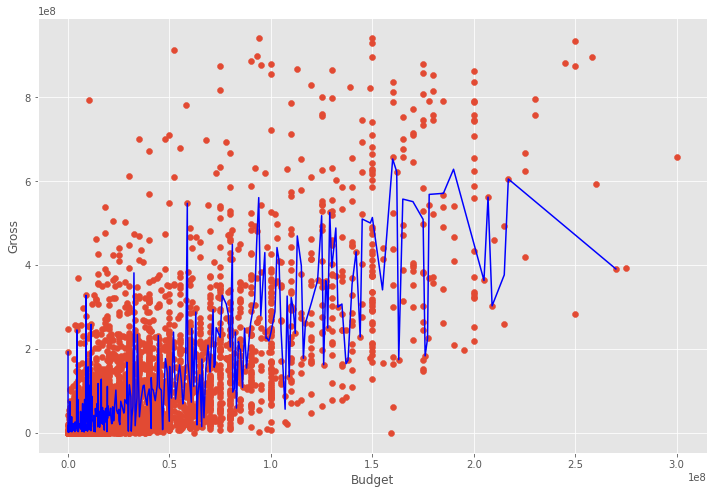

In [27]:
#create a plot for budget vs gross

#creating the scatterplot
plt.scatter('budget', 'gross', data=df_clipped)

#adding an average line
plt.plot('budget', 'gross', data=budget_clipped, c='b')

#labeling gross vs budget
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show